In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlite3 import connect
import nltk
from tqdm import tqdm
%matplotlib inline

In [2]:
con = connect('../data/nips-papers/database.sqlite')

In [3]:
titles = [x[0] for x in con.execute('select title from papers;').fetchall()]
texts = [x[0] for x in con.execute('select paper_text from papers;').fetchall()]

In [44]:
from collections import Counter

In [46]:
def tokenize(texts):
    texts_tokenized = []
    counter = Counter()
    for text in tqdm(texts):
        tokens = [x.lower() for x in nltk.word_tokenize(text)]
        texts_tokenized.append(tokens)
        counter.update(tokens)
    return texts_tokenized, counter

## Text vocabulary analysis

In [47]:
texts_tokenized, counter = tokenize(texts)

  3%|██▎                                                                            | 190/6560 [00:06<02:51, 37.15it/s]


KeyboardInterrupt: 

### Top 10 tokens without filtration

In [23]:
counter.most_common(10)

[(',', 1960823),
 ('the', 1738830),
 ('.', 1621878),
 ('?', 1582064),
 (')', 1047467),
 ('(', 1043377),
 ('of', 886950),
 ('and', 647244),
 ('a', 642349),
 ('in', 543638)]

### Top 10 tokens with length greater than 2

In [42]:
words = counter.keys()
long_words = [w for w in words if len(w) > 2]
long_counter = Counter({k : counter[k] for k in long_words})

In [43]:
long_counter.most_common(10)

[('the', 1738830),
 ('and', 647244),
 ('for', 354940),
 ('that', 264697),
 ('with', 201241),
 ('this', 168342),
 ('are', 164026),
 ('can', 116736),
 ('from', 111621),
 ('which', 95596)]

### Top 10 tokens with length greater than 2 and without stopwords

In [37]:
stop_words = set(nltk.corpus.stopwords.words('english'))
good_words = [w for w in words if len(w) > 2 and not w in stop_words]
good_counter = Counter({k : counter[k] for k in good_words})

In [38]:
good_counter.most_common(10)

[('model', 91029),
 ('learning', 88581),
 ('data', 81327),
 ('algorithm', 71782),
 ('set', 65855),
 ('function', 60905),
 ('using', 59934),
 ('one', 51899),
 ('figure', 47961),
 ('number', 47635)]

## Texts length ditribution analysis

In [70]:
def print_stats(array, name):
    print('Min {}: '.format(name), np.min(array))
    print('Max {}: '.format(name), np.max(array))
    print('Mean {}: '.format(name), np.mean(array))

### Distribution of text lengths in characters

In [71]:
char_lengths = [len(text) for text in texts]

In [73]:
print_stats(char_lengths, 'length in chars')

Min length in chars:  9
Max length in chars:  123727
Mean length in chars:  27389.4207317


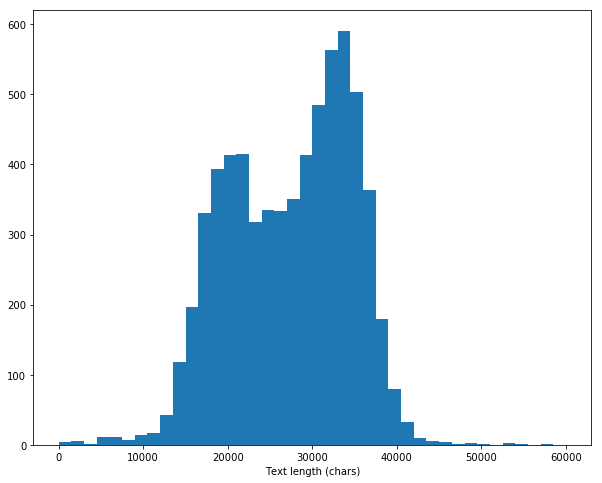

In [59]:
plt.subplots(figsize=(10, 8))
plt.hist(char_lengths, bins=40, range=(0, 60000));
plt.xlabel('Text length (chars)')

### Distribution of text lengths in unfiltered tokens

In [31]:
token_lengths = [len(tokenized_text) for tokenized_text in texts_tokenized]

In [74]:
print_stats(token_lengths, 'length in unfiltered tokens')

Min length in unfiltered tokens:  0
Max length in unfiltered tokens:  27072
Mean length in unfiltered tokens:  5897.45045732


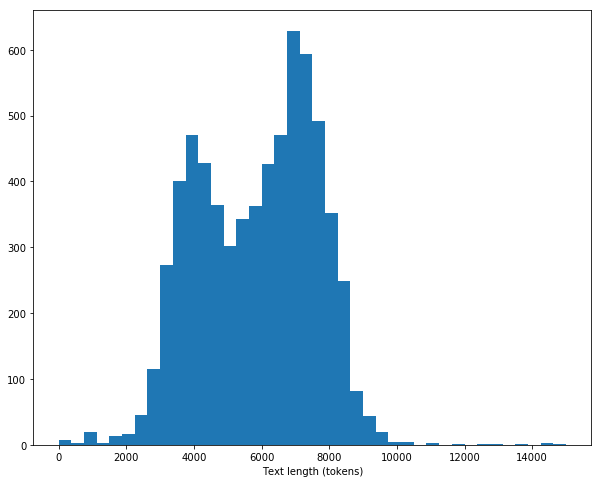

In [56]:
plt.subplots(figsize=(10, 8))
plt.hist(token_lengths, bins=40, range=(0, 15000));
plt.xlabel('Text length (tokens)')

### Distribution of text lengths in filtered tokens

In [39]:
texts_tokenized_filtered = []
for tokenized_text in texts_tokenized:
    texts_tokenized_filtered.append([t for t in tokenized_text if len(t) > 2 and not t in stop_words])

In [40]:
token_lengths_filtered = [len(tokenized_text) for tokenized_text in texts_tokenized_filtered]

In [75]:
print_stats(token_lengths_filtered, 'length in filtered tokens')

Min length in filtered tokens:  0
Max length in filtered tokens:  10900
Mean length in filtered tokens:  2298.52088415


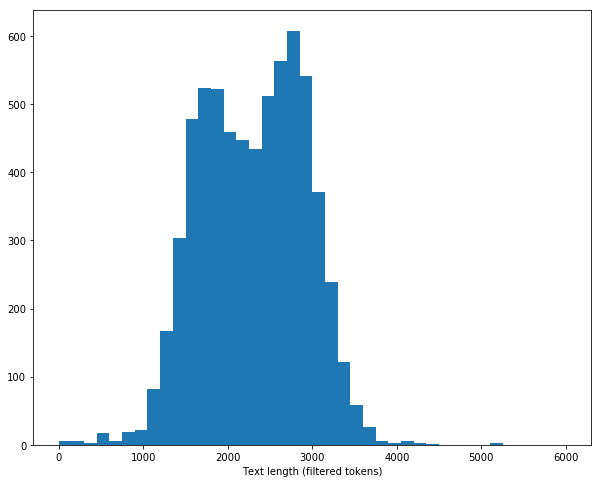

In [55]:
plt.subplots(figsize=(10, 8))
plt.hist(token_lengths_filtered, bins=40, range=(0, 6000));
plt.xlabel('Text length (filtered tokens)')

## Title vocabulary analysis

In [48]:
titles_tokenized, title_counter = tokenize(titles)

100%|████████████████████████████████████████████████████████████████████████████| 6560/6560 [00:00<00:00, 7321.42it/s]


### Top 10 tokens without filter

In [49]:
title_counter.most_common(10)

[('for', 1846),
 ('of', 1714),
 ('learning', 1373),
 ('and', 1190),
 ('a', 1086),
 ('in', 987),
 ('the', 897),
 ('with', 884),
 (':', 753),
 ('neural', 580)]

### Top 10 tokens after filtration

In [50]:
good_title_words = [w for w in title_counter.keys() if len(w) > 2 and not w in stop_words]
filtered_title_counter = Counter({k : title_counter[k] for k in good_title_words})

In [54]:
filtered_title_counter.most_common(10)

[('learning', 1373),
 ('neural', 580),
 ('networks', 534),
 ('models', 448),
 ('using', 433),
 ('model', 360),
 ('bayesian', 267),
 ('network', 243),
 ('inference', 238),
 ('data', 237)]

## Title length distribution analysis

### Distribution of title lengths in chars

In [62]:
title_lengths_chars = [len(title) for title in titles]

In [76]:
print_stats(title_lengths_chars, 'length in chars')

Min length in chars:  5
Max length in chars:  156
Mean length in chars:  60.2858231707


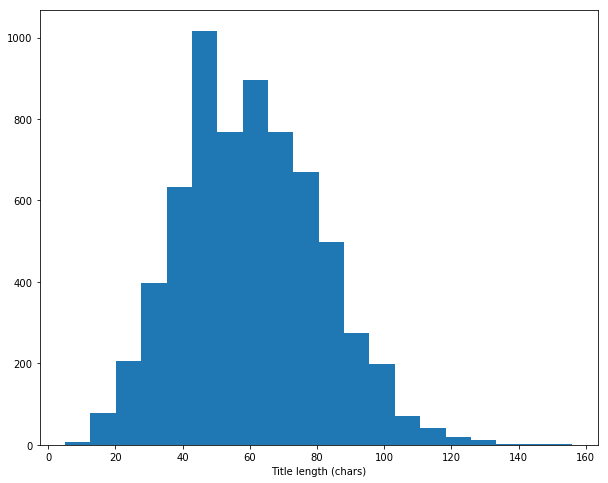

In [77]:
plt.subplots(figsize=(10, 8))
plt.hist(title_lengths_chars, bins=20);
plt.xlabel('Title length (chars)')

### Destribution of title lengths in unfiltered tokens

In [63]:
title_lengths_tokens = [len(title) for title in titles_tokenized]

In [78]:
print_stats(title_lengths_tokens, 'length in unfiltered tokens')

Min length in unfiltered tokens:  1
Max length in unfiltered tokens:  23
Mean length in unfiltered tokens:  7.83582317073


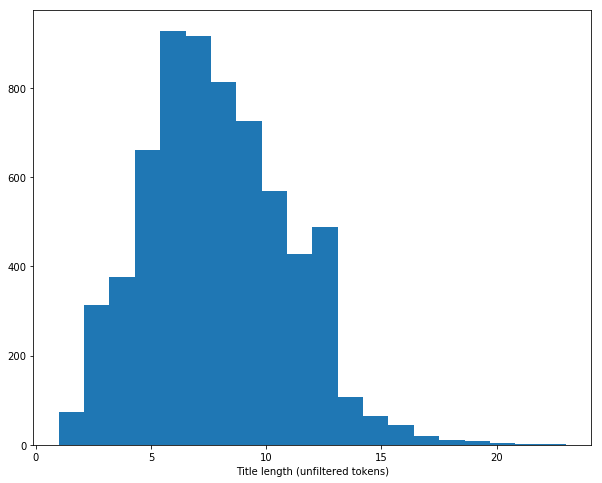

In [80]:
plt.subplots(figsize=(10, 8))
plt.hist(title_lengths_tokens, bins=20);
plt.xlabel('Title length (unfiltered tokens)')

In [83]:
titles_tokenized_filtered = []
for tokenized_title in titles_tokenized:
    titles_tokenized_filtered.append([t for t in tokenized_title if len(t) > 2 and not t in stop_words])

In [84]:
title_lengths_tokens_filtered = [len(title) for title in titles_tokenized_filtered]

### Distribution of title lengths in filtered tokens

In [85]:
print_stats(title_lengths_tokens_filtered, 'length in filtered tokens')

Min length in filtered tokens:  1
Max length in filtered tokens:  15
Mean length in filtered tokens:  5.94451219512


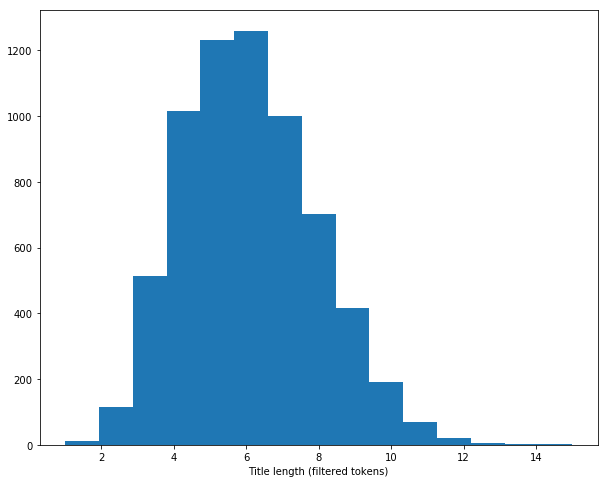

In [88]:
plt.subplots(figsize=(10, 8))
plt.hist(title_lengths_tokens_filtered, bins=15);
plt.xlabel('Title length (filtered tokens)')